In [2]:

%pylab inline

from zernike import RZern

import argparse


Populating the interactive namespace from numpy and matplotlib


In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as mtick
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import ImageGrid

# Pre-defined colormap
top = mpl.cm.get_cmap('Oranges_r', 128)
bottom = mpl.cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcmp = ListedColormap(newcolors, name='OrangeBlue')

plot_style = {
    'mpl_toolkits.legacy_colorbar': False,
    'axes.formatter.use_mathtext': True,
    'text.usetex': False,
}
mpl.rcParams.update(plot_style)


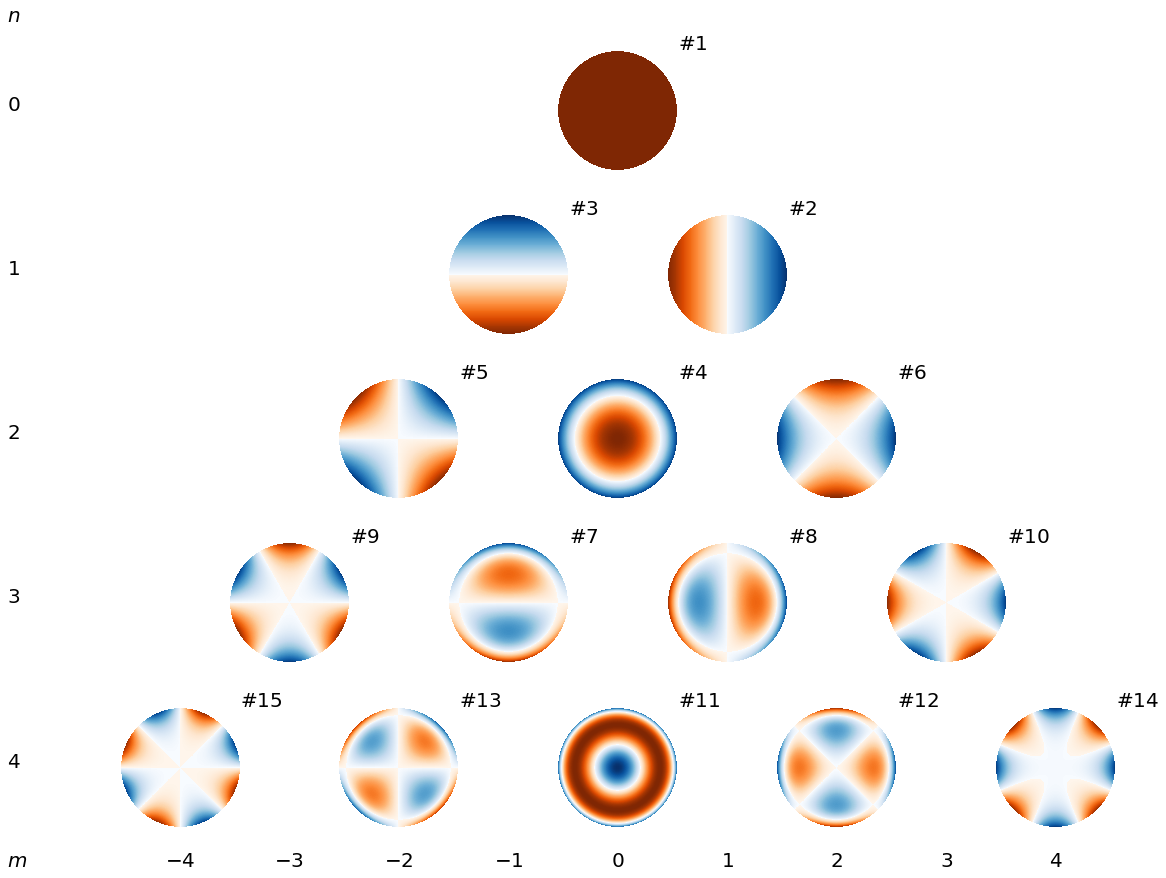

In [7]:



args = {'max_radial_order':4
}

fs = 20
fs1 = 20

nradial = args['max_radial_order']
cart = RZern(nradial)
L, K = 300, 300
ddx = np.linspace(-1.0, 1.0, K)
ddy = np.linspace(-1.0, 1.0, L)
xv, yv = np.meshgrid(ddx, ddy)
cart.make_cart_grid(xv, yv)
c = np.zeros(cart.nk)
ns = np.unique(cart.ntab)

fig = plt.figure(figsize=(16,12))

span = 0.05
leftoff = .03
while nradial >= 0:
    nk = (nradial + 1) * (nradial + 2) // 2
    nrows = nradial + 1
    ncols = np.where(cart.ntab == nradial)[0].size
    height1 = (1 - (nrows + 1) * span) / nrows
    width1 = (1 - (ncols + 1) * span) / ncols
    min1 = min(width1, height1)
    if min1 > 0:
        height1 = min1
        width1 = min1
        width_span = (1 - min1 * ncols) / (ncols + 1)
        height_span = (1 - min1 * nrows) / (nrows + 1)
        break
    else:
        nradial -= 1

for i in range(nradial + 1):
    n = ns[i]
    inds = np.where(cart.ntab == n)[0]
    ms = cart.mtab[inds]
    inds = inds[ms.argsort()]

    left = (1 - inds.size * width1 - (inds.size - 1) * width_span) / 2
    bott = (1 - nrows * height1 - (nrows - 1) * height_span) / 2

    bt = (bott + (nrows - i - 1) * (height1 + height_span))

    for j in range(inds.size):
        lf = left + j * (width1 + width_span) + leftoff
        ax = fig.add_axes([lf, bt, width1, height1])

        c *= 0.0
        c[inds[j]] = 1.0
        Phi = cart.eval_grid(c, matrix=True)
        ax.imshow(Phi, origin='lower', extent=[0, 1, 0, 1], cmap=newcmp)
        ax.axis('off')

        ze = inds[j] + 1
        zn = cart.ntab[inds[j]]
        zm = cart.mtab[inds[j]]

        ax.text(1,
                1,
                '$\\#' + str(ze) + '$',
                transform=ax.transAxes,
                fontsize=fs1)

    plt.text(0,
             bt + height1 / 2,
             '$' + str(zn) + '$',
             transform=fig.transFigure,
             fontsize=fs)

plt.text(0, 1, '$n$', transform=fig.transFigure, va='top', fontsize=fs)
plt.text(0, 0, '$m$', transform=fig.transFigure, va='bottom', fontsize=fs)

ms = np.arange(-nradial, nradial + 1)
left = (1 - inds.size * width1 - (inds.size - 1) * width_span) / 2
left += leftoff + width1 / 2
for i in range(2 * ncols - 1):
    plt.text(left,
             0,
             '$' + str(ms[i]) + '$',
             transform=fig.transFigure,
             ha='center',
             va='bottom',
             fontsize=fs)
    left += (width1 + width_span) / 2

# plt.savefig('zernike_maps_article.pdf')
plt.show()

